Gender voice dataset
Source : https://www.mldata.io/dataset-details/gender_voice/
meanfreq	-	mean frequency (in kHz)

sd	-	standard deviation of frequency

median - median frequency (in kHz)

IQR	-	interquantile range (in kHz)

sp.ent	-	spectral entropy

centroid	-	frequency centroid (see specprop)

minfun	-	minimum fundamental frequency measured across acoustic signal

label	-	Predictor class, male or female

In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [66]:
data = pd.read_csv('gender_voice_dataset.csv')
data.sample(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2059,0.157375,0.059417,0.168703,0.139805,0.188033,0.048229,2.722492,11.598569,0.932947,0.610590,...,0.157375,0.173366,0.045326,0.262295,0.175272,0.007812,0.351562,0.343750,0.183983,female
2635,0.210142,0.038040,0.206166,0.186288,0.237404,0.051116,1.797463,6.291106,0.860924,0.222836,...,0.210142,0.153493,0.046967,0.279070,1.121745,0.023438,8.578125,8.554688,0.132962,female
253,0.130312,0.084918,0.128418,0.079538,0.205061,0.125523,31.723464,1077.206855,0.847654,0.499980,...,0.130312,0.105474,0.019536,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1645,0.187837,0.062374,0.206362,0.176674,0.227318,0.050644,2.453493,9.085739,0.915608,0.512878,...,0.187837,0.171340,0.016145,0.275862,0.206620,0.007812,0.468750,0.460938,0.121550,female
1073,0.199138,0.058724,0.217778,0.135453,0.246496,0.111043,1.149770,3.460094,0.901842,0.316278,...,0.199138,0.141119,0.048241,0.277457,1.053571,0.023438,9.398438,9.375000,0.101757,male
3104,0.157326,0.059300,0.165829,0.148493,0.181413,0.032921,6.629491,60.023636,0.886569,0.499753,...,0.157326,0.159752,0.020080,0.222222,0.584672,0.166016,3.828125,3.662109,0.235795,female
453,0.085832,0.091395,0.058552,0.005004,0.147882,0.142878,9.649950,113.751759,0.842682,0.434538,...,0.085832,0.097472,0.016343,0.231884,0.132308,0.007812,1.492188,1.484375,0.111579,male
402,0.183018,0.060242,0.182637,0.135589,0.239487,0.103897,1.246407,4.483309,0.930985,0.500405,...,0.183018,0.116028,0.039702,0.213333,0.520380,0.007812,3.273438,3.265625,0.157895,male
2643,0.219603,0.034781,0.213718,0.199697,0.247709,0.048012,3.304549,19.069617,0.843357,0.160845,...,0.219603,0.163591,0.047856,0.274286,2.410236,0.210938,8.859375,8.648438,0.206077,female
3122,0.212288,0.036183,0.209806,0.193368,0.236684,0.043316,2.346276,10.428156,0.889736,0.195598,...,0.212288,0.143622,0.043193,0.279114,1.351665,0.021533,8.290283,8.268750,0.123326,female


In [67]:
data.shape

(3168, 21)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [69]:
data.keys()

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [70]:
labelEncoder = LabelEncoder()

data.label = labelEncoder.fit_transform(data.label.astype(str))

data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [71]:
labelEncoder.classes_

array(['female', 'male'], dtype=object)

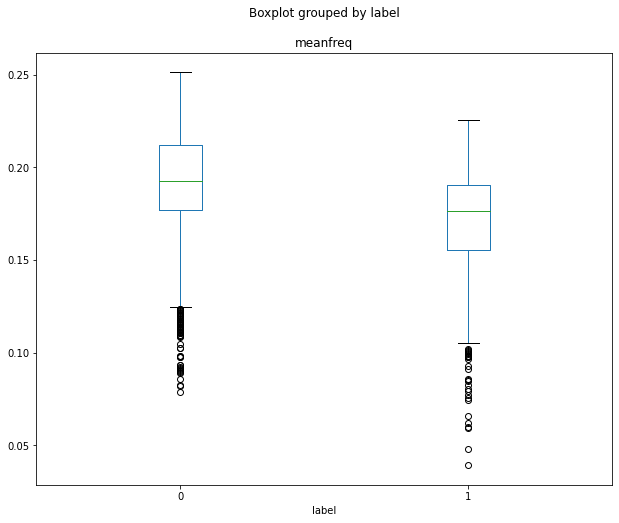

In [72]:
data.boxplot(by ='label', column =['meanfreq'], grid = False, figsize=(10, 8) )

### Logistic Regression Classifier


In [73]:
def logistic_model(x_train, y_train):
    print("Logistic Regression Model")
    logistic_classifier = LogisticRegression(penalty='l2', solver='liblinear')
    logistic_classifier.fit(x_train, y_train)
    return logistic_classifier 


### Naive Baye's Classifier


In [74]:
def naive_bayes_model(x_train, y_train):
    print("Naive Bayes model")
    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(x_train, y_train)
    return naive_bayes_classifier

### K-nearest-neighbors Classifier

In [75]:
def k_nearest_neighbors_model(x_train, y_train):
    print("K-Nearest neighbor model")
    k_nearest_neighbors_classifier = KNeighborsClassifier(n_neighbors=10)
    k_nearest_neighbors_classifier.fit(x_train, y_train)
    return k_nearest_neighbors_classifier


### Support Vector Classifier

In [76]:
def svc_model(x_train, y_train):
    print("SVC model")
    svc_classifier = SVC(kernel='rbf', gamma='scale')
    svc_classifier.fit(x_train, y_train)
    return svc_classifier

### MLP Neural Network Classifier

In [77]:
def mlp_model(x_train, y_train):
    print("MLP Neural Network")
    mlp_classifier = MLPClassifier(activation='relu', hidden_layer_sizes=(20,20,20) , solver='adam', verbose=True, max_iter=1000)
    mlp_classifier.fit(x_train, y_train)

    return mlp_classifier

### Decision Tree Classifier

In [88]:
def decision_tree_model(x_train, y_train):
    print("Decision tree model")
    decision_classifier = DecisionTreeClassifier(max_depth=6)
    decision_classifier.fit(x_train, y_train)
    return decision_classifier

### Train-Test Split and Standard Scaler

Defining the X and Y variables and splitting the data 80% training and 20% test, and standardizing the x-variables.

In [79]:
    X = data.drop('label', axis=1)
    Y = data['label']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)

    x_test = scaler.transform(x_test)
    

### Build, Train, test and evaluate model 
 For our evaluations We not only measured the accuracy but also displayed the confusion matrix which evaluates the performance of each classification. From the confusion matrix we can derive the Precision (ratio of True positive(TP)/(TP + FP(False Positive))) , Recall(ratio of TP/TP + FN (False Negative)) and f1 - scores(where weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. f1 = 2 * (precision * recall) / (precision + recall)).
    

In [80]:
def build_and_train_model(data, target_name, class_fn):

    model = class_fn(x_train, y_train)
    
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Testing Score: ", accuracy)

    Confusion_Matrix = confusion_matrix(y_test, y_pred)
    
    Classification_report = classification_report(y_test, y_pred)

    df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
    print(df_y.sample(10))


    return {'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred, 'sample' : df_y.sample(10), 'Confusion Matrix' : print(' \n Confusion_matrix : \n', Confusion_Matrix),
            'Classification Report' : print('\n Classification Report : \n', Classification_report)
           }






Utilizing the build and train model function to predict classification (male or female), score and generate classification report for eeach model on the data. 3 inputs as needed: data file, value to predict(label), and the type of model below. Results in order Training score, Testing/accuracy, precision, recall and f1- score to evaluate the classification accuracy and the Y_test: actual values and Y_pred = predicted values. 

In [81]:
Logistic_Regression_model = build_and_train_model(data, 'label', logistic_model)

Logistic Regression Model
Training Score :  0.9747434885556433
Testing Score:  0.973186119873817
      y_test  y_pred
2942       0       0
3038       0       0
2025       0       0
69         1       1
1081       1       1
316        1       1
1606       0       0
1768       0       0
2638       0       0
1917       0       0
 
 Confusion_matrix : 
 [[289  12]
 [  5 328]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       301
           1       0.96      0.98      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [82]:
naive_bayes_model = build_and_train_model(data, 'label', naive_bayes_model)

Naive Bayes model
Training Score :  0.8970007892659826
Testing Score:  0.8848580441640379
      y_test  y_pred
2997       0       0
2031       0       0
2205       0       0
3035       0       0
953        1       1
1708       0       0
496        1       0
1511       1       1
905        1       1
2367       0       0
 
 Confusion_matrix : 
 [[266  35]
 [ 38 295]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       301
           1       0.89      0.89      0.89       333

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.88      0.88      0.88       634



In [83]:
k_nearest_neighbors_model = build_and_train_model(data, 'label', k_nearest_neighbors_model)

K-Nearest neighbor model
Training Score :  0.9779005524861878
Testing Score:  0.9747634069400631
      y_test  y_pred
2266       0       0
1511       1       1
2867       0       0
538        1       1
1476       1       1
1140       1       1
852        1       1
1173       1       1
906        1       1
861        1       1
 
 Confusion_matrix : 
 [[292   9]
 [  7 326]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       301
           1       0.97      0.98      0.98       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [84]:
support_vector_classifier_model = build_and_train_model(data, 'label', svc_model)

SVC model
Training Score :  0.9846093133385951
Testing Score:  0.9842271293375394
      y_test  y_pred
2250       0       0
3049       0       0
2587       0       0
825        1       1
648        1       0
3011       0       0
758        1       1
463        1       1
148        1       1
638        1       1
 
 Confusion_matrix : 
 [[297   4]
 [  6 327]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       301
           1       0.99      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [85]:
mlp_classifier_model = build_and_train_model(data, 'label', mlp_model)

MLP Neural Network
Iteration 1, loss = 0.87593562
Iteration 2, loss = 0.72397074
Iteration 3, loss = 0.64056793
Iteration 4, loss = 0.58629383
Iteration 5, loss = 0.54033432
Iteration 6, loss = 0.49558081
Iteration 7, loss = 0.44928715
Iteration 8, loss = 0.39745524
Iteration 9, loss = 0.34044334
Iteration 10, loss = 0.28052684
Iteration 11, loss = 0.22745164
Iteration 12, loss = 0.18493705
Iteration 13, loss = 0.15317522
Iteration 14, loss = 0.13048807
Iteration 15, loss = 0.11443175
Iteration 16, loss = 0.10300998
Iteration 17, loss = 0.09522658
Iteration 18, loss = 0.08849304
Iteration 19, loss = 0.08375180
Iteration 20, loss = 0.08044581
Iteration 21, loss = 0.07768799
Iteration 22, loss = 0.07633596
Iteration 23, loss = 0.07351299
Iteration 24, loss = 0.07073830
Iteration 25, loss = 0.06974036
Iteration 26, loss = 0.06817909
Iteration 27, loss = 0.06632083
Iteration 28, loss = 0.06498196
Iteration 29, loss = 0.06376812
Iteration 30, loss = 0.06318858
Iteration 31, loss = 0.0620742

In [89]:
decision_tree_classifier_model = build_and_train_model(data, 'label', decision_tree_model)

Decision tree model
Training Score :  0.9925019731649566
Testing Score:  0.9637223974763407
      y_test  y_pred
2178       0       0
2103       0       0
2456       0       0
661        1       1
1083       1       1
2910       0       0
2419       0       0
1276       1       1
719        1       1
1952       0       0
 
 Confusion_matrix : 
 [[291  10]
 [ 13 320]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       301
           1       0.97      0.96      0.97       333

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



### Splitting the training data further into two more parts to test warm_start

In [91]:
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(x_train, y_train, test_size=0.5)

### Random Forest Classifier

In [92]:
random_classifier_model = RandomForestClassifier(max_depth=4, n_estimators=2, warm_start=True)

In [99]:
random_classifier_model.fit(x_train_1, y_train_1)
y_pred = random_classifier_model.predict(x_test)
test_score = accuracy = accuracy_score(y_test, y_pred)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Classification_report = classification_report(y_test, y_pred)
print("Testing Score : ", test_score)
print('\n Confusion_matrix : \n', Confusion_Matrix)
print('\n Classification Report : \n', Classification_report)

Testing Score :  0.9684542586750788

 Confusion_matrix : 
 [[290  11]
 [  9 324]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       301
           1       0.97      0.97      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [101]:
random_classifier_model.n_estimators += 2
random_classifier_model.fit(x_train_2, y_train_2)
y_pred = random_classifier_model.predict(x_test)
test_score = accuracy = accuracy_score(y_test, y_pred)
print("Testing Score : ", test_score)
print('\n Confusion_matrix : \n', Confusion_Matrix)
print('\n Classification Report : \n', Classification_report)

Testing Score :  0.9716088328075709

 Confusion_matrix : 
 [[290  11]
 [  9 324]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       301
           1       0.97      0.97      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

